In [1]:
#Import os, pandas and numpy
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mall=pd.read_csv("Mall_customers.csv")

In [5]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
import seaborn as sns

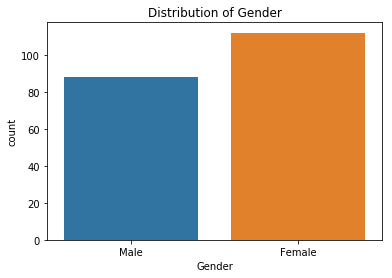

In [9]:
sns.countplot(x='Gender', data=mall);
plt.title('Distribution of Gender');

There are slightly more women than men in this data set. They will perhaps be a significant element in your customer segmentation efforts later.

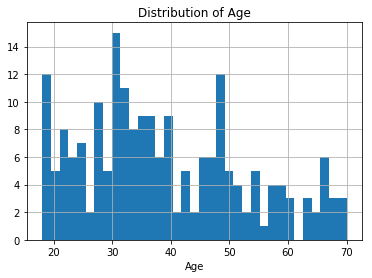

In [10]:
mall.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

In [11]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

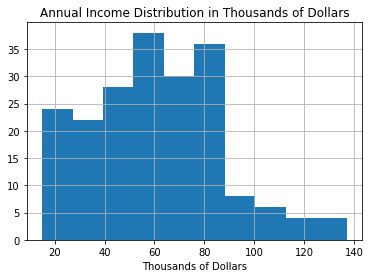

In [14]:
mall.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

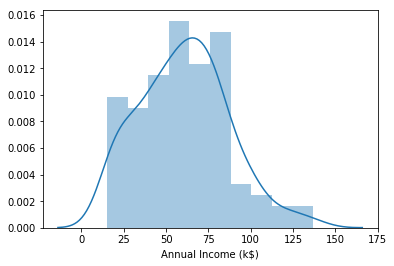

In [15]:
sns.distplot(mall['Annual Income (k$)'])

**Annual Income with gender**

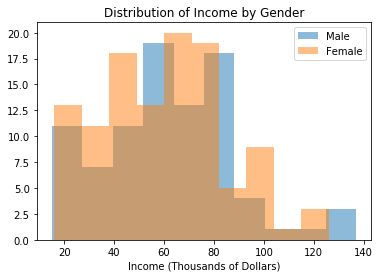

In [16]:
plt.hist('Annual Income (k$)', data=mall[mall['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=mall[mall['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

In [19]:
mall.groupby(by='Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


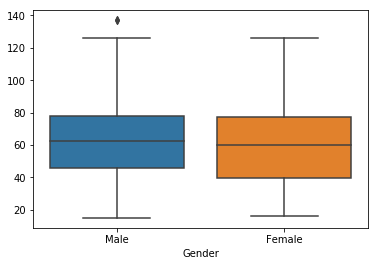

In [24]:
sns.boxplot(x=mall.Gender,y=mall['Annual Income (k$)'].values)
plt.show()

The distribution almost same.But Woman in this dataset makes less money.

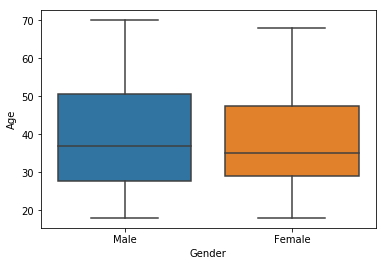

In [23]:
sns.boxplot(x=mall.Gender,y=mall.Age)
plt.show()

In [26]:
data=mall.copy()

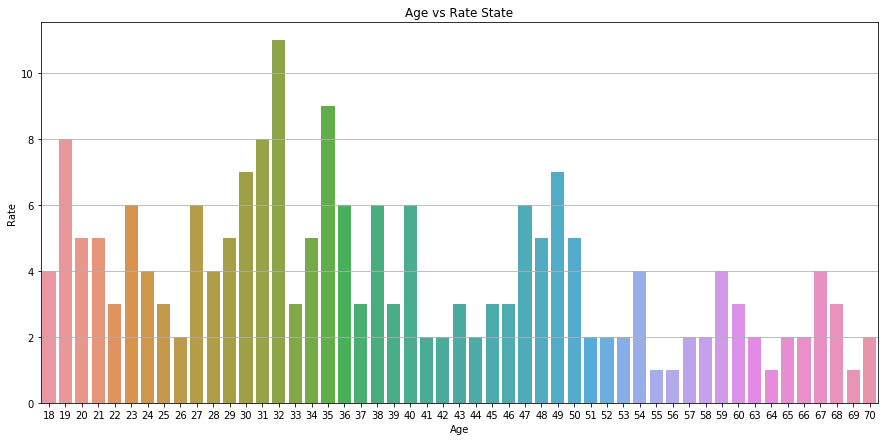

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x=data.Age.value_counts().index,y=data.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.grid(axis='y')
plt.title('Age vs Rate State')
plt.show()

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

In [34]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

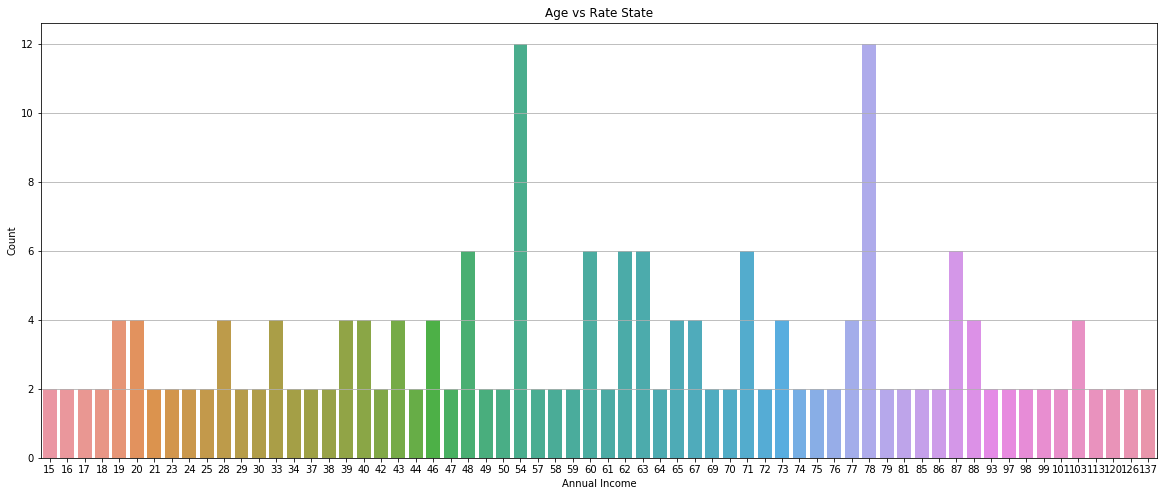

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['Annual Income (k$)'].value_counts().index,y=data['Annual Income (k$)'].value_counts().values)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.grid(axis='y')
plt.title('Age vs Rate State')
plt.show()

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars.
There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

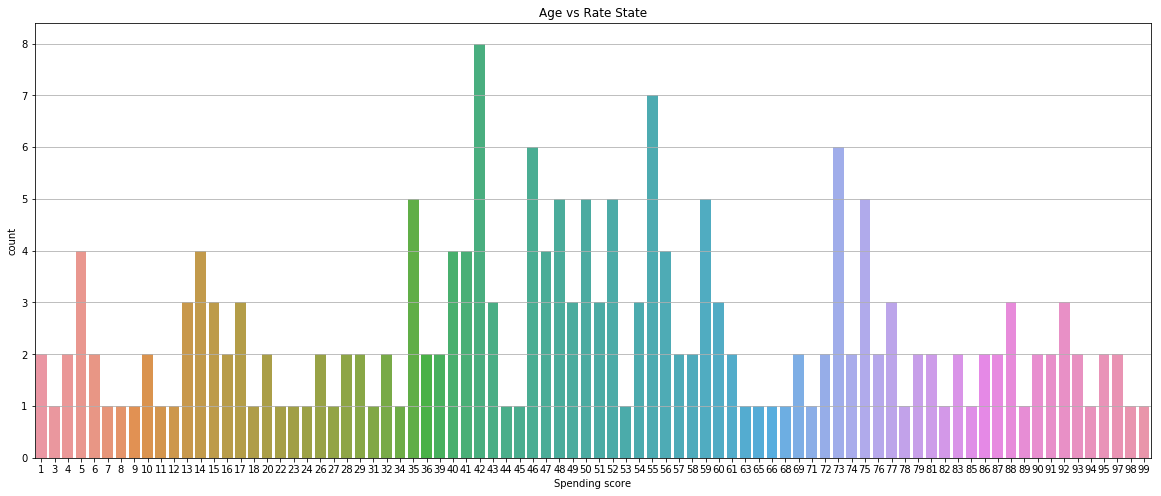

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['Spending Score (1-100)'].value_counts().index,y=data['Spending Score (1-100)'].value_counts().values)
plt.xlabel('Spending score')
plt.ylabel('count')
plt.grid(axis='y')
plt.title('Age vs Rate State')
plt.show()

This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.
On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

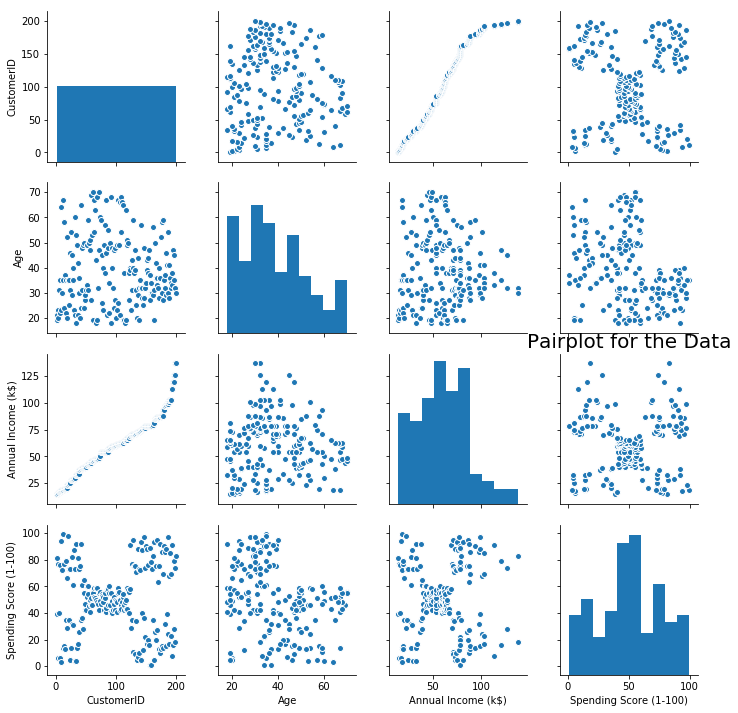

In [44]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

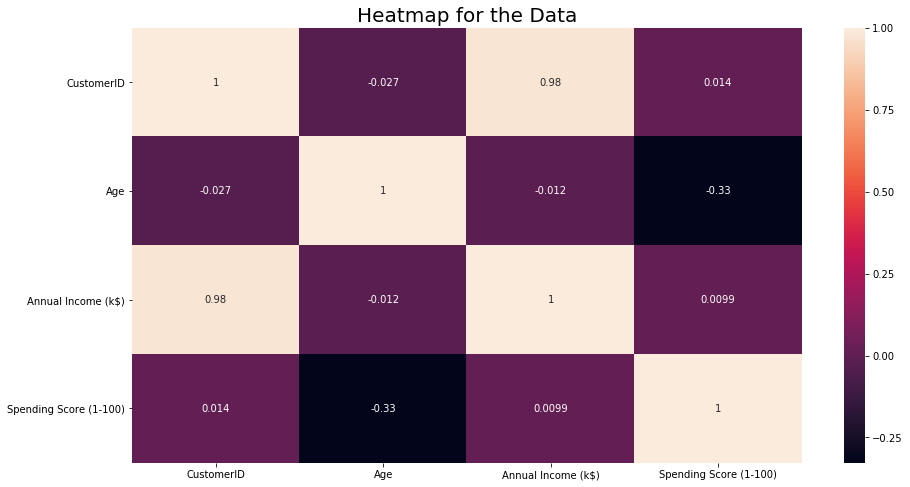

In [45]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset.
We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

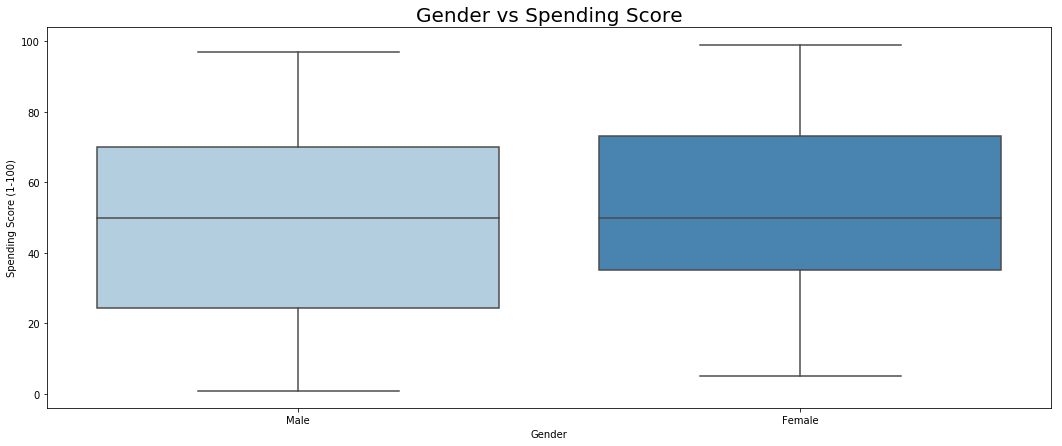

In [46]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

- Bi-variate Analysis between Gender and Spending Score, 
- It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

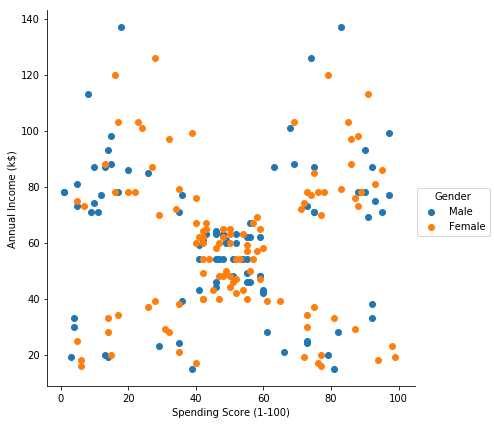

In [52]:
sns.FacetGrid(data,hue='Gender',size=6)\
    .map(plt.scatter,'Spending Score (1-100)','Annual Income (k$)')\
    .add_legend()
plt.show()

We can see in our dataset 5 prominent cluster created based on annual income and spending score.
- less income,less spending
- less income,more spending
- more income,less spending
- more income,more spending
- average income,average spending

**Clustering**

In [70]:
x = data.iloc[:, [3, 4]].values
x=pd.DataFrame(x)
# let's check the shape of x
print(x.shape)

(200, 2)


**K-Means Algorithm**

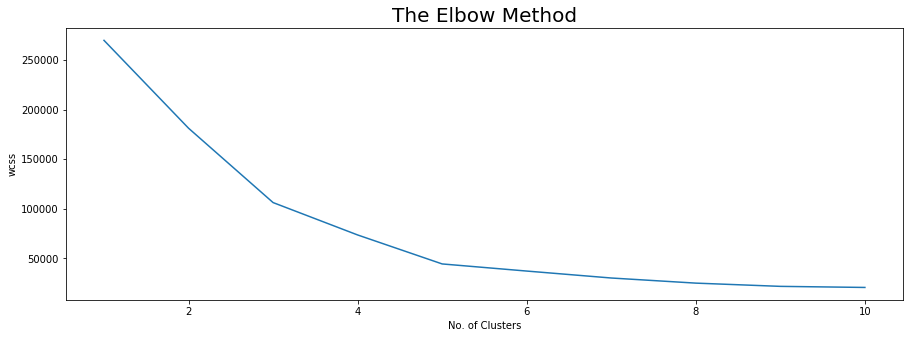

In [58]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

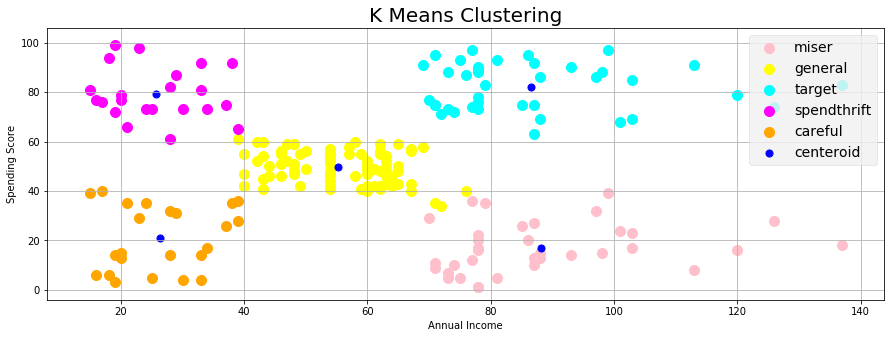

In [59]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift,  Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

**Hierarchial Clustering**<br>
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

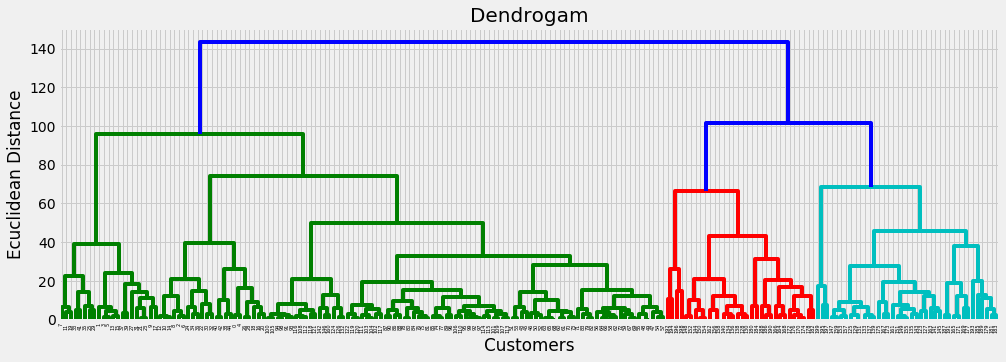

In [61]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'complete'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

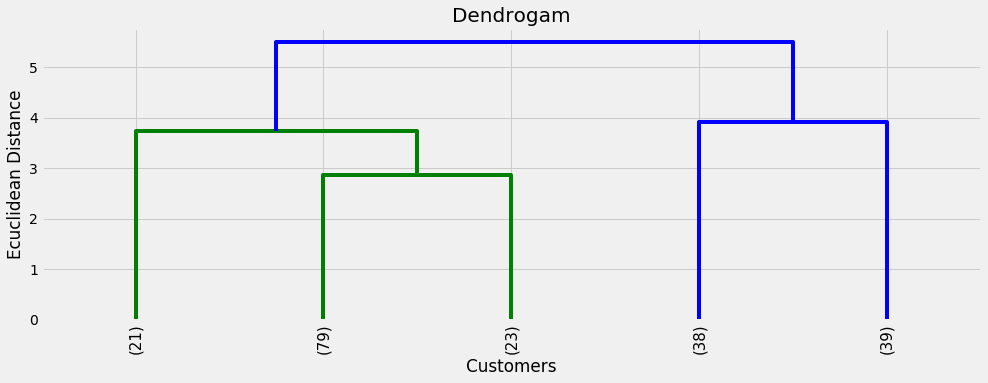

In [76]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x_scaled, method = 'complete'),truncate_mode='lastp',p=5,leaf_rotation=90, leaf_font_size=15)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [64]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [71]:
x_scaled = x.apply(lambda y: (y - np.mean(y)) / np.std(y))

In [72]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [73]:
hclust.fit(x_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

In [74]:
hclust.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [75]:
data['Groups'] = hclust.labels_
data.Groups.value_counts()

4    79
0    39
2    38
1    23
3    21
Name: Groups, dtype: int64

**K-means Algorithm**

In [79]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Groups
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


In [80]:
x = data.iloc[:, [2,3, 4]].values
x=pd.DataFrame(x)

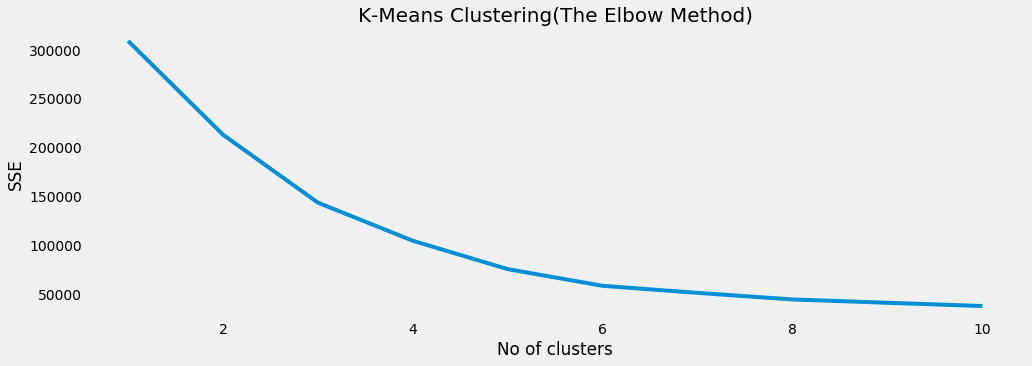

In [83]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [85]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [87]:
x3=data.copy()
x3['Groups']=np.array(labels3)
x3.Groups.value_counts()

0    76
1    39
2    37
4    25
3    23
Name: Groups, dtype: int64

According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to  optimize the spending scores of the customer in the Mall.